In [1]:
import numpy as np
import os
import pathlib
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [2]:
dataset_path = os.path.join(os.getcwd(), 'Brain Tumor Data Set')
dataset = tf.keras.utils.image_dataset_from_directory(dataset_path)

dataset

Found 4514 files belonging to 2 classes.


<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [3]:
class_names = dataset.class_names
print(class_names)

['Brain Tumor', 'Healthy']


In [4]:
data_dir = pathlib.Path(dataset_path)
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

4600


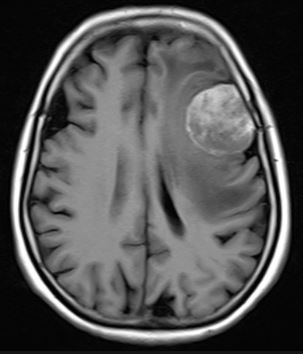

In [5]:
tumors = list(data_dir.glob('Brain Tumor/*'))
PIL.Image.open(str(tumors[100]))

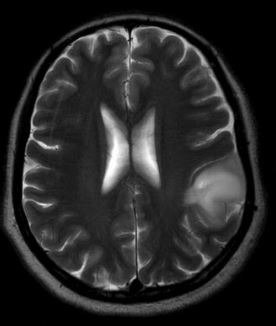

In [6]:
healthy = list(data_dir.glob('Healthy/*'))
PIL.Image.open(str(healthy[100]))

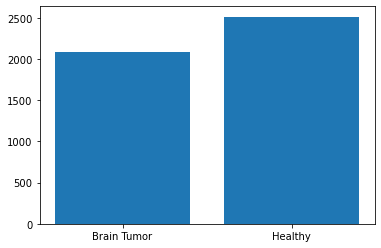

In [7]:
plt.bar(class_names, [len(healthy), len(tumors)])
plt.show();

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)


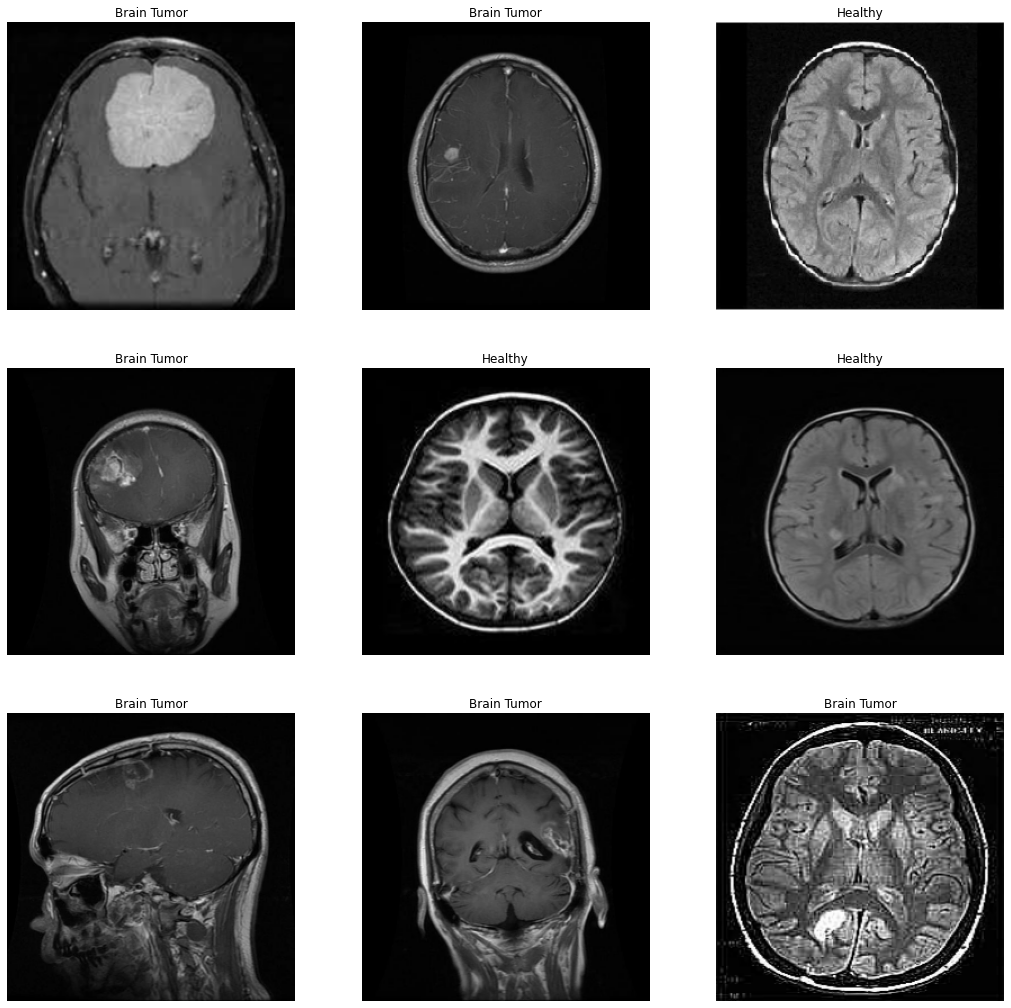

In [8]:
plt.figure(figsize=(18, 18))

for images, labels in dataset.take(1):
    for i in range(9):
        print(labels[i])
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')
        
plt.show();

In [9]:
ds_train = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=404,
    batch_size=64
)

Found 4514 files belonging to 2 classes.
Using 3612 files for training.


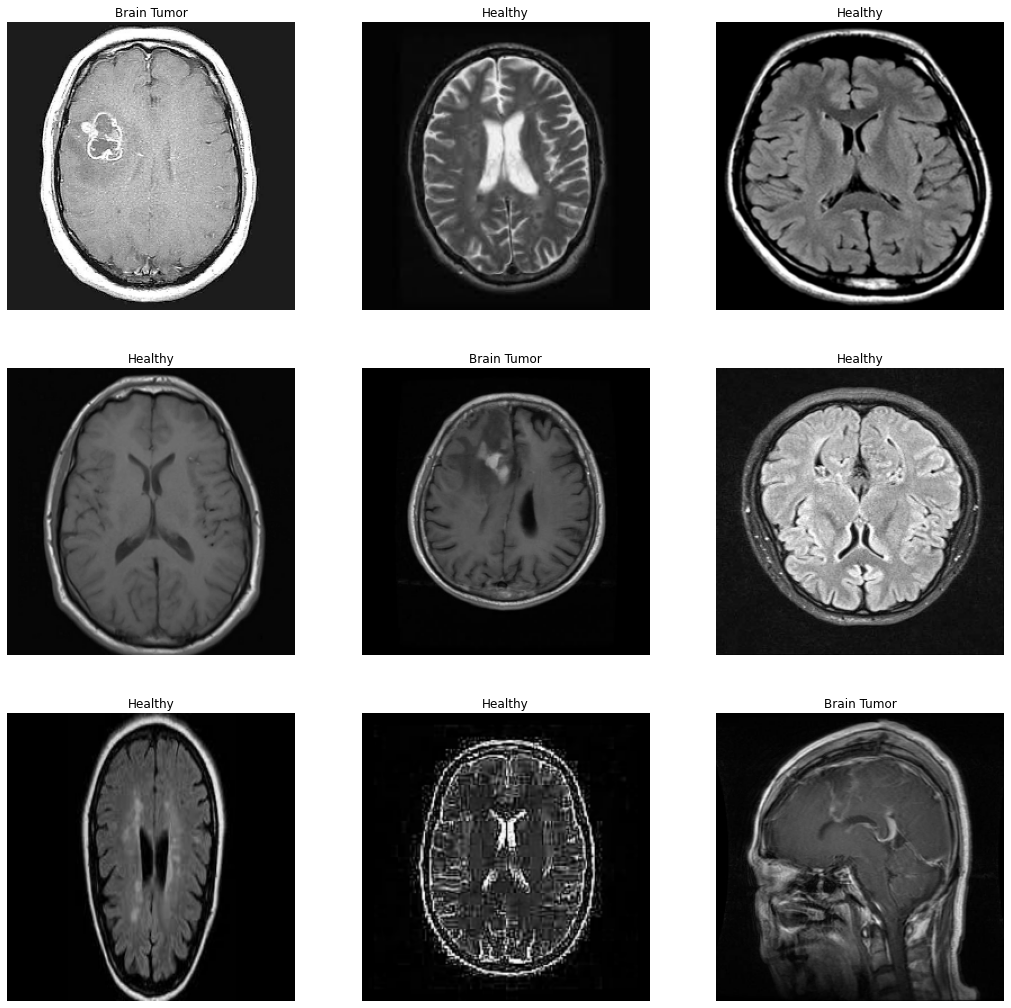

In [10]:
plt.figure(figsize=(18, 18))

for images, labels in ds_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')
        
plt.show();

In [11]:
ds_val = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=404,
    batch_size=64
)

Found 4514 files belonging to 2 classes.
Using 902 files for validation.


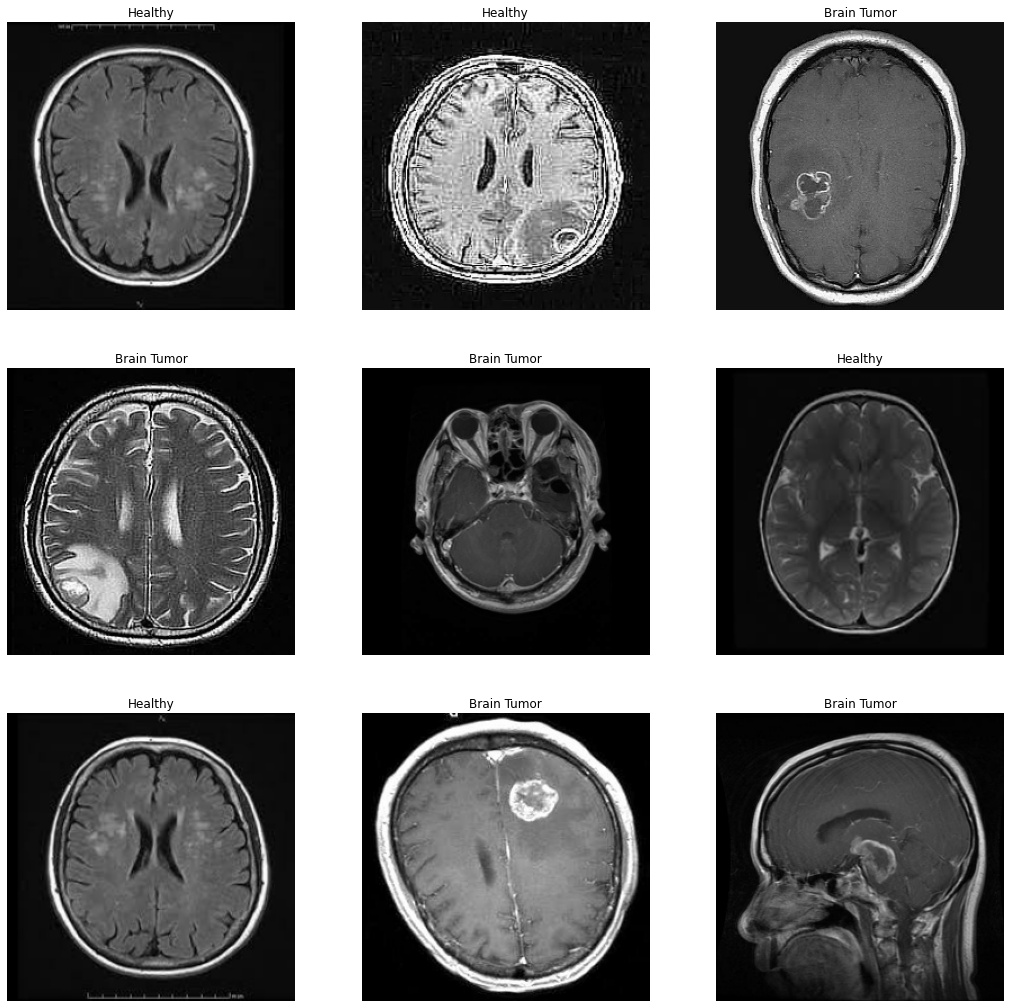

In [12]:
plt.figure(figsize=(18, 18))

for images, labels in ds_val.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')
        
plt.show();